# Setting up and loading the data

In [2]:
library(foreign)
library(ggplot2)

In [3]:
wber <- read.dta("/Users/victordesalins/Documents/Toulouse M2/Cours/Empirical project (BEER)/wber.dta")
upcber <- read.dta("/Users/victordesalins/Documents/Toulouse M2/Cours/Empirical project (BEER)/upcber.dta")


In [4]:
ber=merge(x = upcber, y=wber, by="upc")

---

# A few descriptive stats

In [5]:
number_upc=length(unique(ber$upc))
number_beer_title=length(unique(ber$descrip))
number_nitem=length(unique(ber$nitem))

There are **{{number_upc}}** different UPCs <br>
**{{number_beer_title}}** different beer titles  <br>
and **{{number_nitem}}** "nitem" values in the dataset.

## Number of beers on the market

In [6]:
# getting the number of beers depending on the variable we want to use as a proxy
beer_nb_market<- data.frame(unique(ber$week))
colnames(beer_nb_market) <- "week"


for ( i in 1 : nrow(beer_nb_market)){
  beer_nb_market$nb_beers_upc[i] <- nrow(data.frame(unique(ber$upc[ber$week== beer_nb_market$week[i]])))
  beer_nb_market$nb_beers_descrip[i] <- nrow(data.frame(unique(ber$descrip[ber$week== beer_nb_market$week[i]])))
  beer_nb_market$nb_beers_nitem[i] <- nrow(data.frame(unique(ber$nitem[ber$week== beer_nb_market$week[i] ])))
}



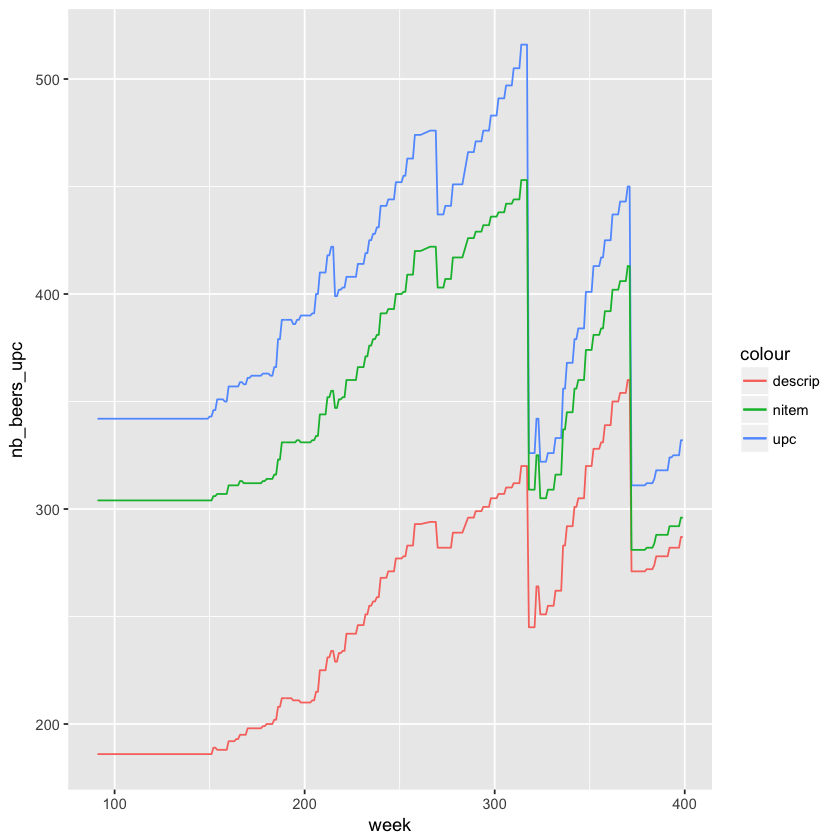

In [7]:
# plotting
ggplot(data = beer_nb_market)+ geom_line(aes(x=week,y=nb_beers_upc,color="upc"))+ geom_line(aes(x=week,y=nb_beers_descrip,color="descrip"))+ geom_line(aes(x=week,y=nb_beers_nitem,color="nitem"))

---

# Data on entry and exit of beers on the market

### Descrip variable

In [8]:
# creating for each beer its date of entry on the market and its date of exit based on beer title.

for (i in unique(ber$descrip)){
    ber$beer_entry[ber$descrip==i] <- min(ber$week[ber$descrip == i])
    ber$beer_exit[ber$descrip==i] <- max(ber$week[ber$descrip == i])
}

weeks_entry_descrip=length(unique(ber$beer_entry))
weeks_exit_descrip=length(unique(ber$beer_exit))
beer_entry_descrip=length(unique(ber$descrip[ber$beer_entry!=91]))
beer_exit_descrip=length(unique(ber$descrip[ber$beer_exit!=399]))


There are **{{weeks_entry_descrip}} weeks during which the entry of a new beer occurs** while only **{{weeks_exit_descrip}} weeks during which some beers leave the market**. 
Based on the beer description there are only **{{beer_entry_descrip}} entries of new beer** on the market (based on its description) and **{{beer_exit_descrip}} beers exiting**.

### UPC variable

In [9]:
# creating for each beer its date of entry on the market and its date of exit based on UPC.

for (i in unique(ber$upc)){
    ber$beer_entry[ber$upc==i] <- min(ber$week[ber$upc == i])
    ber$beer_exit[ber$upc==i] <- max(ber$week[ber$upc == i])
}
weeks_entry_upc=length(unique(ber$beer_entry))
weeks_exit_upc=length(unique(ber$beer_exit))
beer_entry_upc=length(unique(ber$upc[ber$beer_entry!=91]))
beer_exit_upc=length(unique(ber$upc[ber$beer_exit!=399]))


There are **{{weeks_entry_upc}} weeks during which the entry of a new beer occurs** while only **{{weeks_exit_upc}} weeks during which some beers leave the market**. 
Based on the UPC there are only **{{beer_entry_upc}} entries of new beer** on the market (based on its UPC) and **{{beer_exit_upc}} beers exiting**.

### nitem variable

In [10]:
# creating for each beer its date of entry on the market and its date of exit based on "nitem" variable.

for (i in unique(ber$nitem)){
    ber$beer_entry[ber$nitem==i] <- min(ber$week[ber$nitem == i])
    ber$beer_exit[ber$nitem==i] <- max(ber$week[ber$nitem == i])
}
weeks_entry_nitem=length(unique(ber$beer_entry))
weeks_exit_nitem=length(unique(ber$beer_exit))
beer_entry_nitem=length(unique(ber$nitem[ber$beer_entry!=91]))
beer_exit_nitem=length(unique(ber$nitem[ber$beer_exit!=399]))

There are **{{weeks_entry_nitem}} weeks during which the entry of a new beer occurs** while only **{{weeks_exit_nitem}} weeks during which some beers leave the market**. 
Based on the nitem variable there are only **{{beer_entry_nitem}} entries of new beer** on the market (based on its nitem value) and **{{beer_exit_nitem}} beers exiting**.

## Deriving the number of ENTRY per week

In [17]:

beer_entry_dates<- data.frame(unique(ber$beer_entry))
colnames(beer_entry_dates) <- "week"


for ( i in 1 : nrow(beer_entry_dates)){
    beer_entry_dates$nb_beers_nitem[i] <- nrow(data.frame(unique(ber$nitem[ber$beer_entry== beer_entry_dates$week[i] ])))
    beer_entry_dates$nb_beers_upc[i] <- nrow(data.frame(unique(ber$upc[ber$beer_entry== beer_entry_dates$week[i] ])))
    beer_entry_dates$nb_beers_descrip[i] <- nrow(data.frame(unique(ber$descrip[ber$beer_entry== beer_entry_dates$week[i] ])))
}

beer_entry_dates=beer_entry_dates[beer_entry_dates$week!=91,]
beer_entry_dates=beer_entry_dates[order(beer_entry_dates$week),]


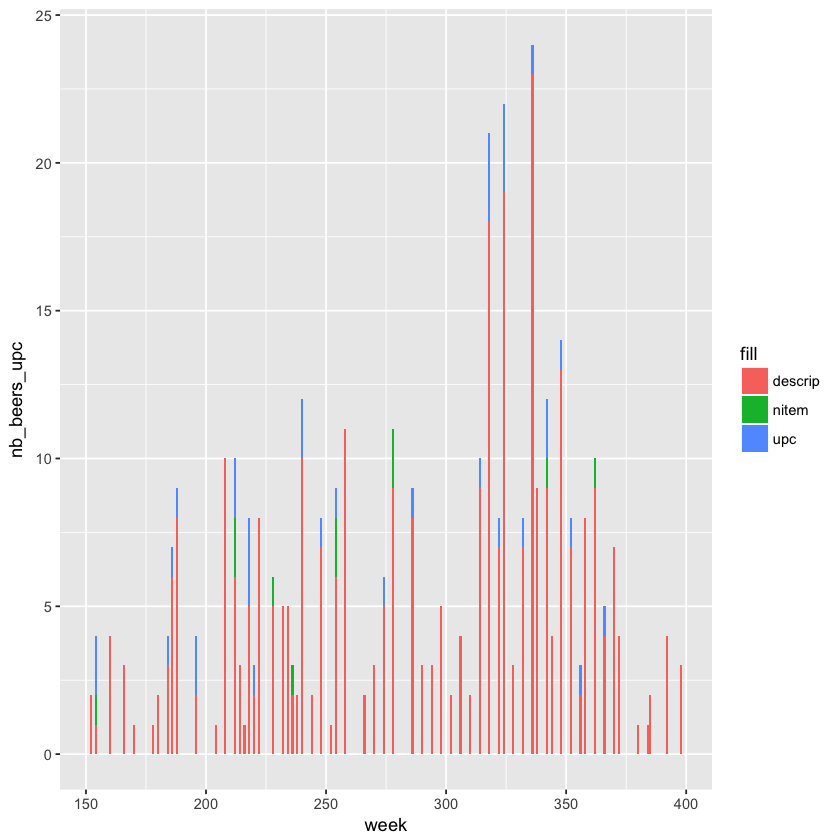

In [25]:
#plotting all variables
ggplot(data = beer_entry_dates)+ geom_col(aes(x=week,y = nb_beers_upc, fill="upc")) + geom_col(aes(x=week,y = nb_beers_nitem, fill="nitem")) + geom_col(aes(x=week,y = nb_beers_descrip, fill="descrip"))

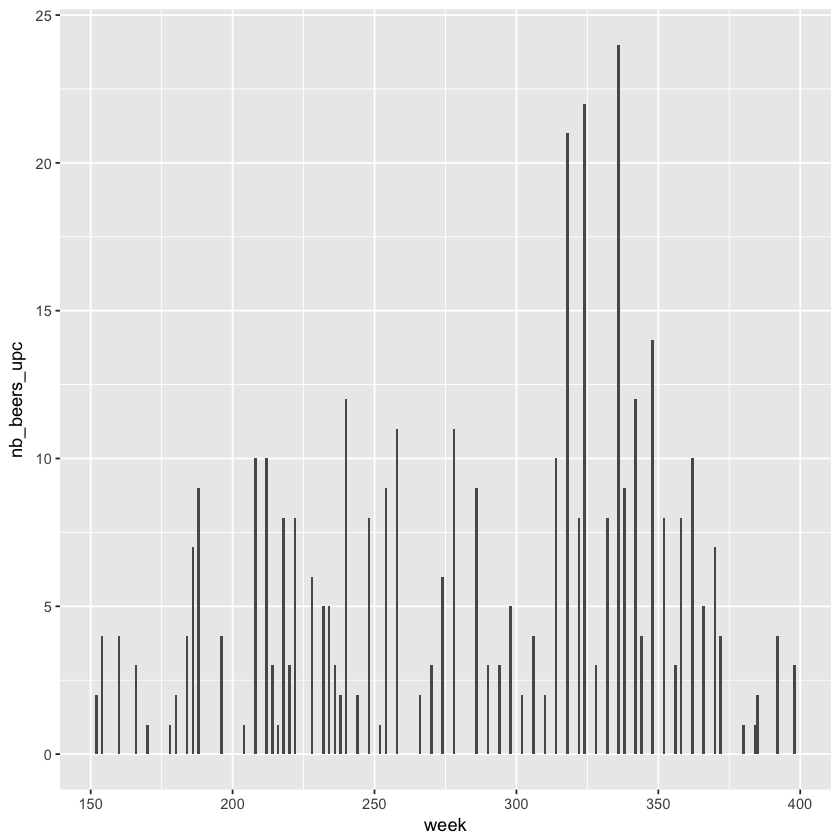

In [12]:
#plotting UPC
ggplot(data = beer_entry_dates, aes(x=week,y = nb_beers_upc))+ geom_col()

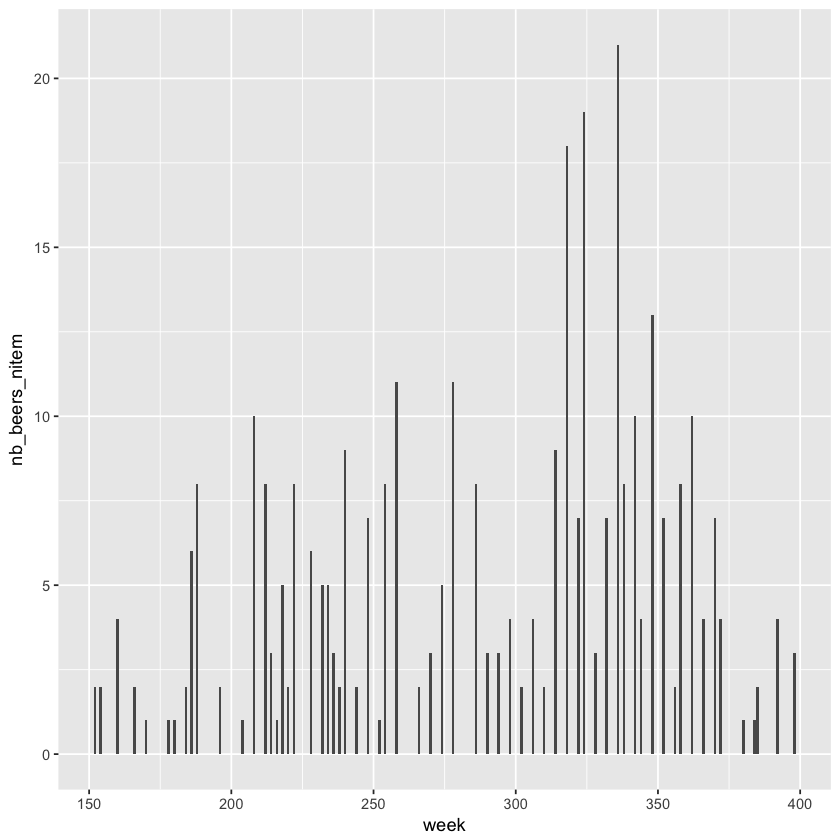

In [13]:
#plotting nitem
ggplot(data = beer_entry_dates, aes(x=week,y = nb_beers_nitem))+ geom_col()

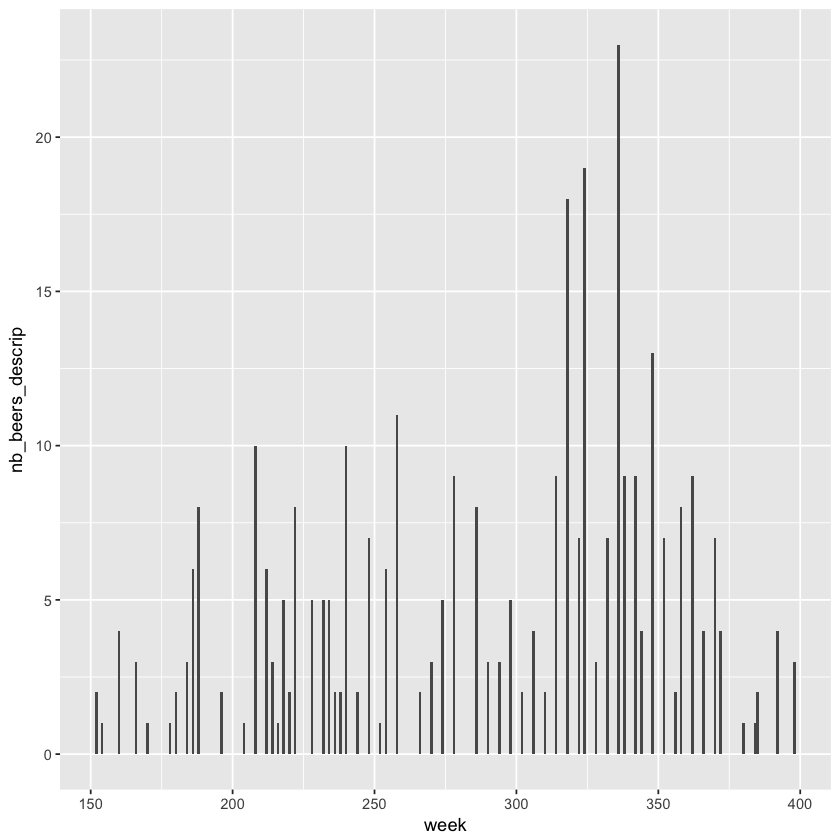

In [14]:
#plotting descrip
ggplot(data = beer_entry_dates, aes(x=week,y = nb_beers_descrip))+ geom_col()

## Deriving the number of EXIT per week

In [15]:

beer_exit_dates<- data.frame(unique(ber$beer_exit))
colnames(beer_exit_dates) <- "week"

for ( i in 1 : nrow(beer_exit_dates)){
  beer_exit_dates$nb_beers[i] <- nrow(data.frame(unique(ber$upc[ber$beer_exit== beer_exit_dates$week[i] ])))
}

beer_exit_dates=beer_exit_dates[beer_exit_dates$week!=399,]
beer_exit_dates=beer_exit_dates[order(beer_exit_dates$week),]


In [26]:
beer_exit_dates

,week,nb_beers
9,153,1
11,167,1
8,215,8
10,217,1
14,219,1
4,269,23
13,273,1
12,277,1
3,317,157
6,321,3


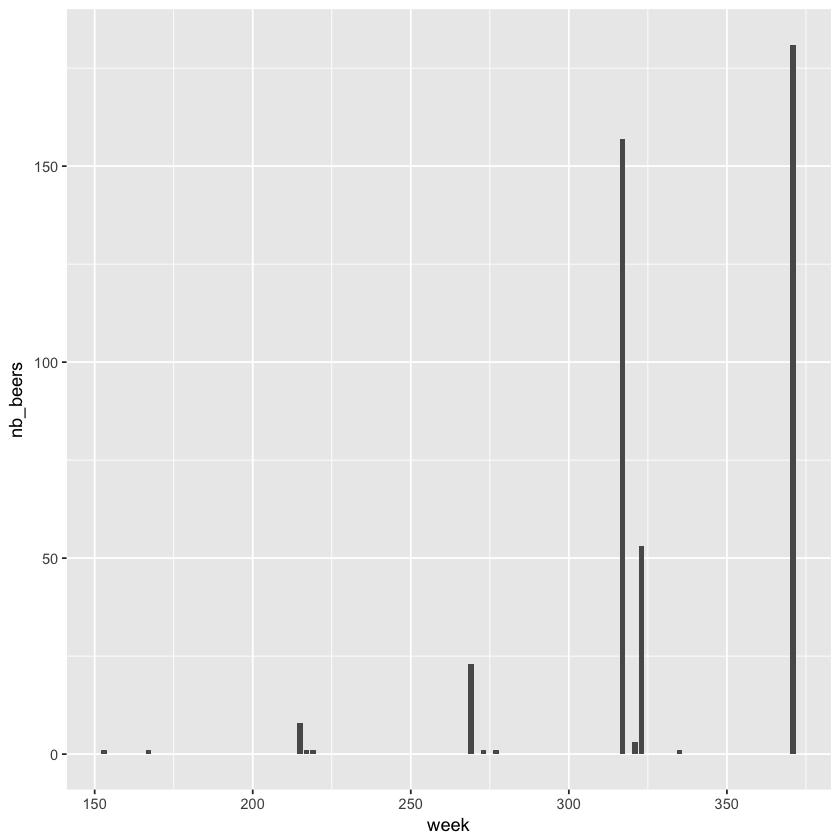

In [16]:
#plotting
ggplot(data = beer_exit_dates, aes(x=week,y = nb_beers))+ geom_col()

# Draft

In [ ]:
ber[1:10,]